In [143]:
with open('flowers.jsonl', 'w') as file:
    dataset = tf.data.TextLineDataset(IMPORT_FILE)
    for line in dataset:
        file.write(json.dumps(ast.literal_eval(str(line.numpy(), 'utf-8'))))
        file.write('\n')

In [175]:
!gsutil cat gs://cloud-samples-data/ai-platform/flowers/train_set.csv | wc -l

3300


In [191]:
for record in dataset.take(1):
    print(record)
    parsed = tfio.experimental.serialization.decode_json(record, specs)
    print(parsed)

tf.Tensor(b'{"imageGcsUri": "gs://ucaip-test-us-central1/dataset/image/flower/roses/10090824183_d02c613f10_m.jpg", "classificationAnnotation": {"displayName": "roses"}, "dataItemResourceLabels": {"aiplatform.googleapis.com/ml_use": "training"}}', shape=(), dtype=string)


InvalidArgumentError: no value for /dataItemResurceLabels/aiplatform.googleapis.com\/ml_use [Op:IO>DecodeJSON]

In [190]:
specs = {
        'imageGcsUri': tf.TensorSpec(tf.TensorShape([]), tf.string),
        'classificationAnnotation': {
            'displayName': tf.TensorSpec(tf.TensorShape([]), tf.string)
        },
        'dataItemResurceLabels': {
            'aiplatform.googleapis.com\/ml_use': tf.TensorSpec(tf.TensorShape([]), tf.string)
        }
    }

dataset = tf.data.TextLineDataset('flowers.jsonl')

In [191]:
for record in dataset.take(1):
    print(record)
    parsed = tfio.experimental.serialization.decode_json(record, specs)
    print(parsed)

tf.Tensor(b'{"imageGcsUri": "gs://ucaip-test-us-central1/dataset/image/flower/roses/10090824183_d02c613f10_m.jpg", "classificationAnnotation": {"displayName": "roses"}, "dataItemResourceLabels": {"aiplatform.googleapis.com/ml_use": "training"}}', shape=(), dtype=string)


InvalidArgumentError: no value for /dataItemResurceLabels/aiplatform.googleapis.com\/ml_use [Op:IO>DecodeJSON]

In [ ]:
IMPORT_FILE = 'gs://cloud-samples-data/vision/automl_classification/flowers/flowers-50.jsonl'

In [ ]:
specs = {
        'imageGcsUri': tf.TensorSpec(tf.TensorShape([]), tf.string)
    }

In [ ]:
tf.TensorShape([]).rank

In [ ]:
parsed = tfio.experimental.serialization.decode_json(json_text, specs)

In [ ]:
parsed = tfio.experimental.serialization.decode_json(json_text, specs)

In [1]:
import pandas as pd

df = pd.read_json('flowers.jsonl', lines=True) 

In [2]:
pd.json_normalize(df['dataItemResourceLabels']).values

array([['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['test'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['validation'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['validation'],
       ['test'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['validation'],
       ['test'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['validation'],
       ['test'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],
       ['training'],


In [3]:
df['dataItemResourceLabels'].apply(pd.Series)

,aiplatform.googleapis.com/ml_use
0,training
1,training
2,training
3,training
4,training
5,training
6,test
7,training
8,training
9,training


In [4]:
for item in df['dataItemResourceLabels']:
    print(item['aiplatform.googleapis.com/ml_use'])

training
training
training
training
training
training
test
training
training
training
training
validation
training
training
training
training
training
training
training
training
validation
test
training
training
training
training
training
validation
test
training
training
training
training
training
validation
test
training
training
training
training
training
training
training
training
training
training
training
training
validation
test


In [6]:
%load_ext autoreload
%autoreload 2

In [8]:


import matplotlib.pyplot as plt

from trainer.task import get_datasets



In [14]:
%env AIP_DATA_FORMAT=jsonl
%env AIP_TRAINING_DATA_URI=gs://jk-ucaip-demos/custom_container_20201208034037/dataset-1172730306092859392-image_classification_multi_label-2020-12-08T03:41:20.819505Z/training-*
%env AIP_VALIDATION_DATA_URI=gs://jk-ucaip-demos/custom_container_20201208034037/dataset-1172730306092859392-image_classification_multi_label-2020-12-08T03:41:20.819505Z/validation-*
            

env: AIP_DATA_FORMAT=jsonl
env: AIP_TRAINING_DATA_URI=gs://jk-ucaip-demos/custom_container_20201208034037/dataset-1172730306092859392-image_classification_multi_label-2020-12-08T03:41:20.819505Z/training-*
env: AIP_VALIDATION_DATA_URI=gs://jk-ucaip-demos/custom_container_20201208034037/dataset-1172730306092859392-image_classification_multi_label-2020-12-08T03:41:20.819505Z/validation-*


In [15]:
train_ds, valid_ds, class_names = get_datasets(32, 224, 224)

In [17]:
class_names

array([b'daisy', b'dandelion', b'roses', b'sunflowers', b'tulips'],
      dtype=object)

In [13]:
model = get_model(64, 0.5, len(class_names))
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                

In [284]:
pattern = 'gs://jk-ucaip-demos/custom_container_20201208034037/dataset-1172730306092859392-image_classification_multi_label-2020-12-08T03:41:20.819505Z/training-*'

In [281]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
#class_names = ['daisy', 'dandelion', 'roses', 'sunflowers']
ds = image_dataset_from_aip_jsonl(pattern, class_names, 224, 224)

In [282]:
for batch in ds.take(3):
    print(batch)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 2

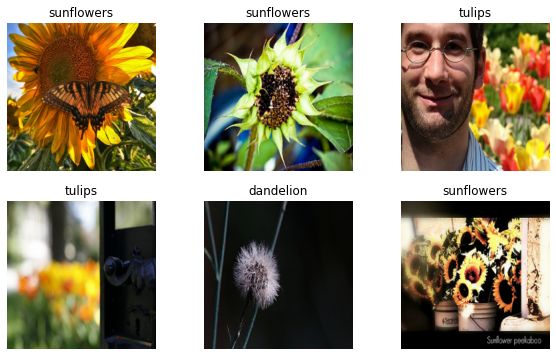

In [12]:
plt.figure(figsize=(10, 6))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
def get_datasets_v2(batch_size):
    """
    Creates training and validation splits as 
    tf.data datasets.
    """
    
    url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
    data_root = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)
    
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_root,
        validation_split=0.2,
        subset='training',
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size)
    
    valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_root,
        validation_split=0.2,
        subset='validation',
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size)
    
    class_names = train_ds.class_names
    
    AUTOTUNE = tf.data.experimental.AUTOTUNE

    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
    
    return train_ds, valid_ds, class_names


#### Assemble the job specification

In [ ]:
custom_job_spec = {
    "display_name": job_name,
    "job_spec": {
        "worker_pool_specs": worker_pool_spec
    }
}

custom_job_spec

#### Submit the training job

Create the job client.

In [ ]:
client_options = {"api_endpoint": API_ENDPOINT}

job_client = aip.JobServiceClient(
        client_options=client_options
    )

In [ ]:
response = job_client.create_custom_job(parent=PARENT, custom_job=custom_job_spec)
response

Start the training job.